# Naive Bayes Classifier

Essential libraries:

- **pandas** and **numpy**: for data manipulation and numerical operations.
- **re** and **string**: for regular expressions and string handling.
- **nltk**: for natural language processing tasks (e.g., stopword removal).
- **matplotlib.pyplot** and **seaborn**: for creating plots and visualizations.
- **TfidfVectorizer**: to transform text data into numerical feature vectors.
- **SMOTE**: to handle class imbalance by oversampling the minority class.
- **train_test_split**: to split the dataset into training and testing subsets.
- **MultinomialNB**: a Naive Bayes classifier suitable for text data.
- **metrics**: for model evaluation (accuracy, confusion matrix, etc.).


In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


This line loads a dataset named email.csv into a pandas DataFrame called df.

In [2]:
# Load dataset
df = pd.read_csv("email.csv")

This line ensures that the NLTK corpus for stopwords is downloaded locally.
Stopwords are common words (like 'the', 'is', 'and') that are typically removed from text data to focus on meaningful words.

In [3]:
# Download stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\corma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

This code block cleans the data:

- Drops missing entries.
- Renames the columns to **"Category"** and **"Message"**.
- Converts the **"Category"** into binary labels (0 = ham, 1 = spam).
- Defines a function `clean_text()` to:
  - Lowercase all text.
  - Remove numbers and punctuation.
  - Remove stopwords.
- Applies the cleaning function to the dataset to produce a `clean_text` column.


In [4]:
# Check for missing values
df.dropna(inplace=True)

df.columns = ["Category", "Message"]

# Convert labels to binary (0 = Ham, 1 = Spam) and handle NaN values
df["label"] = df["Category"].map({"ham": 0, "spam": 1}).fillna(0).astype(int)

# Text Cleaning Function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = " ".join([word for word in text.split() if word not in stopwords.words("english")])  # Remove stopwords
    return text

# Apply cleaning function
df["clean_text"] = df["Message"].apply(clean_text)

This block transforms the cleaned text into a TF-IDF matrix (Term Frequency-Inverse Document Frequency), creating a numerical feature representation suitable for machine learning models.
``y`` is set as the target variable (labels).

In [5]:
# Convert text into numerical form using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df["clean_text"])  # Feature Matrix
y = df["label"].astype(int)  # Target (0 = ham, 1 = spam)

This block uses **SMOTE** (Synthetic Minority Over-sampling Technique) to handle class imbalance by creating synthetic examples for the minority class.
This balances the number of ham and spam samples.

In [6]:
# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)


This block splits the resampled dataset into training and testing sets:
80% training, 20% testing.

In [7]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

This block trains a **Multinomial Naive Bayes** model using the training data.

In [8]:
# Train Naive Bayes Model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

This block saves the trained model and the vectorizer for later use using ``joblib``.

In [9]:
# Save the trained model and vectorizer for later use
import joblib
joblib.dump(model, "spam_classifier.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']

This block makes predictions on the test set and prints the accuracy score and a detailed classification report.

In [10]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9803

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       976
           1       0.97      0.99      0.98       955

    accuracy                           0.98      1931
   macro avg       0.98      0.98      0.98      1931
weighted avg       0.98      0.98      0.98      1931



This block generates and visualizes a **confusion matrix**, which shows how many spam and ham messages were correctly or incorrectly classified.

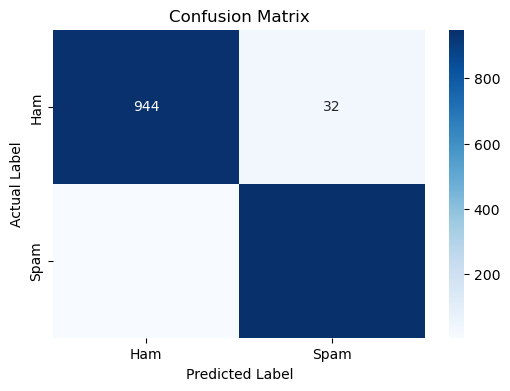

In [11]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

This block shows the **class distribution after applying SMOTE**, ensuring both classes (ham and spam) have roughly equal numbers.

In [12]:
unique, counts = np.unique(y_resampled, return_counts=True)
class_distribution = dict(zip(unique, counts))

df_resampled = pd.DataFrame({'label': y_resampled})
print("\nLabel counts after SMOTE:")
print(df_resampled['label'].value_counts())


Label counts after SMOTE:
label
0    4826
1    4826
Name: count, dtype: int64
